In [1]:
import matplotlib
from PyEMD import EMD
from sklearn.preprocessing import RobustScaler, QuantileTransformer, StandardScaler
%load_ext autoreload 
%autoreload 2
%matplotlib widget
import matplotlib.pyplot as plt
#matplotlib.use("nbagg")
from rbm_robust.data_loading.datasets import D02Dataset
import pandas as pd
import numpy as np
from scipy import signal
from neurokit2 import ecg_peaks
from emrad_toolbox.plotting.radar_plotting.RadarPlotter import RadarPlotter
from emrad_toolbox.radar_preprocessing.radar import RadarPreprocessor
from sklearn.preprocessing import MinMaxScaler

In [2]:
base_path = "/Users/simonmeske/Desktop/TestOrdner"
dataset = D02Dataset(base_path)
subset = dataset[0]

In [7]:
start_time = "17:20:12"
end_time = "17:20:20"
filtered_synced = subset.synced_filtered_data.between_time(start_time, end_time)

## Complete Session

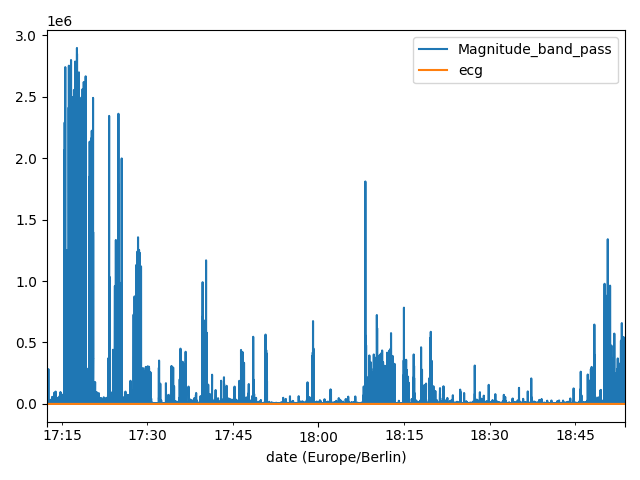

In [5]:
filtered_synced_comp = subset.synced_filtered_data
fig, ax = plt.subplots()
filtered_synced_comp[['Magnitude_band_pass','ecg']].plot(ax=ax)
fig.tight_layout()

## Magnitude

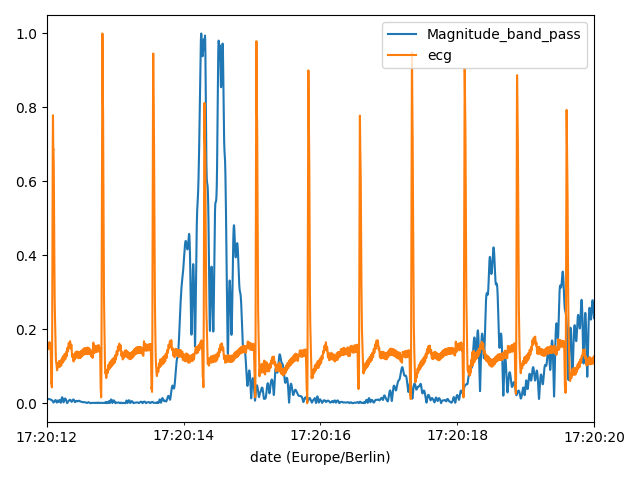

In [23]:
fig, ax = plt.subplots()
filtered_synced_comp = subset.synced_filtered_data.between_time(start_time, end_time).copy()
min_max_scaler = MinMaxScaler()
filtered_synced_comp.loc[:,'Magnitude_band_pass'] = min_max_scaler.fit_transform(filtered_synced_comp[['Magnitude_band_pass']])
filtered_synced_comp.loc[:, 'ecg'] = min_max_scaler.fit_transform(filtered_synced_comp[['ecg']])
filtered_synced_comp[['Magnitude_band_pass','ecg']].plot(ax=ax)
fig.tight_layout()

## Angle

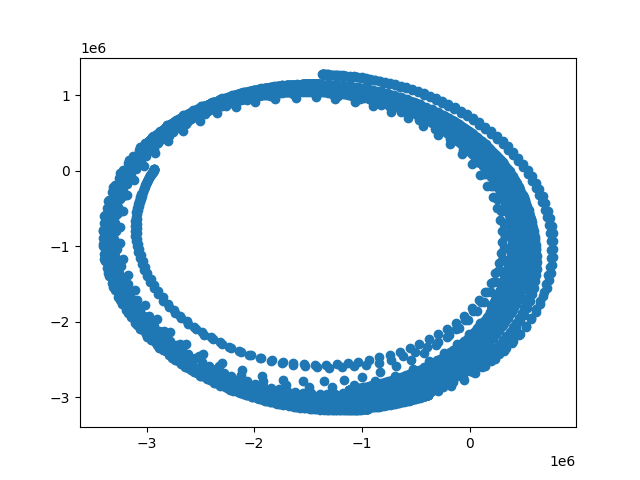

In [29]:
fig, ax  = plt.subplots()
synced = subset.synced_data.between_time(start_time, end_time)
ax.scatter(synced[['radar_I']], synced[['radar_Q']])

## EMD

## Magnitude

In [ ]:
filtered_synced = subset.synced_filtered_data.between_time(start_time, end_time).copy()
r_peaks = ecg_peaks(filtered_synced['ecg'], sampling_rate=1000)[0]['ECG_R_Peaks']
emd = EMD()
imfs = emd.emd(filtered_synced['Magnitude_band_pass'].to_numpy(), np.arange(len(filtered_synced)) / 1000, max_imf=3)
num_imfs = imfs.shape[0]
for i in range(num_imfs):
    fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(8, 10))
    ax1.scatter(np.arange(len(filtered_synced)) / 1000, r_peaks / 62, c='red', marker='x')
    RadarPlotter.plot_wavelet(imfs[i], sampling_rate=1000, signal_type=f"Compression Band Pass (18 to 80 Hz) Start: {start_time} End: {end_time}", log_scale=True, wavelet_coefficients=(50,200), ax=ax1,  **{"color_bar": False})
    ax2.plot(np.arange(len(filtered_synced)) / 1000, filtered_synced['ecg'])
    fig.tight_layout()